# CMB Composite Index

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/cmb-composite-index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
market = '^GSPC'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
benchmark_df = yf.download(market, start, end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461617,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106270,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207161,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777878,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069569,158066000


In [3]:
# Calculate the 14-period RSI
def RSI(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

df['RSI_14'] = RSI(df['Close'], 14)

# Calculate RSI Chg (9-period ROC of 14-period RSI)
df['RSI_Chg'] = df['RSI_14'].diff(9)

# Calculate RSI Mom (3-period SMA of 3-period RSI)
df['RSI_3'] = RSI(df['Close'], 3)
df['RSI_Mom'] = df['RSI_3'].rolling(window=3).mean()

# Calculate the Composite Index Line
df['Composite_Index'] = df['RSI_Chg'] + df['RSI_Mom']

# Calculate the Fast SMA Line (13-period SMA of Composite Index Line)
df['Fast_SMA'] = df['Composite_Index'].rolling(window=13).mean()

# Calculate the Slow SMA Line (33-period SMA of Composite Index Line)
df['Slow_SMA'] = df['Composite_Index'].rolling(window=33).mean()


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14,RSI_Chg,RSI_3,RSI_Mom,Composite_Index,Fast_SMA,Slow_SMA
Date,,,,,,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461617,109560400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106270,133332000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207161,137160000,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777878,150479200,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069569,158066000,NaN,NaN,0.0,0.0,NaN,NaN,NaN


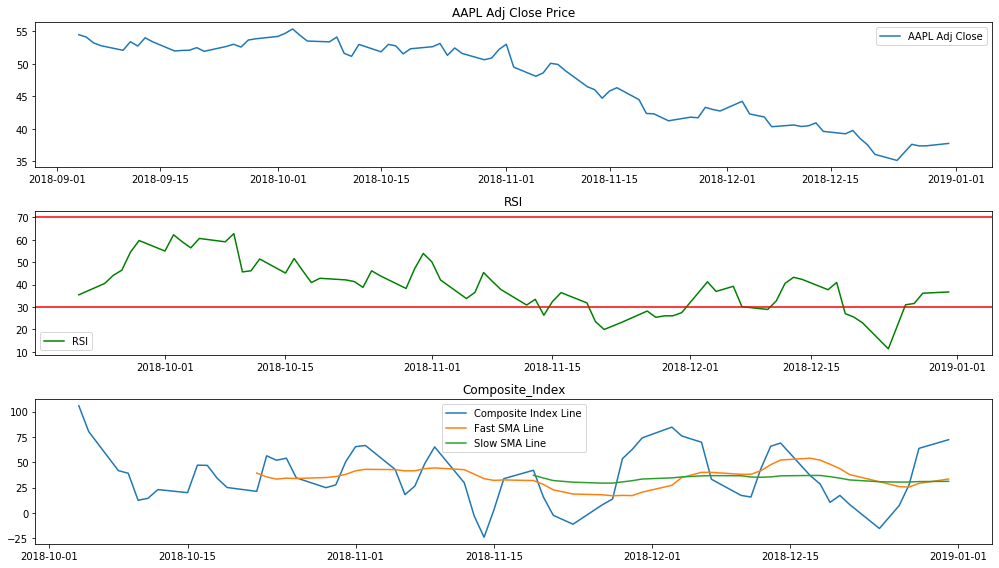

In [5]:
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Adj Close'], label=f'{symbol} Adj Close')
plt.title(f'{symbol} Adj Close Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df.index, df['RSI_14'], label='RSI', color='g')
plt.axhline(70, color='red', linestyle='-')
plt.axhline(30, color='red', linestyle='-')
plt.title('RSI')
plt.legend(loc='best')

plt.subplot(3, 1, 3)
plt.plot(df['Composite_Index'], label='Composite Index Line')
plt.plot(df['Fast_SMA'], label='Fast SMA Line')
plt.plot(df['Slow_SMA'], label='Slow SMA Line')
plt.title('Composite_Index')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## Candlestick with CMB Composite Index

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI_14,RSI_Chg,RSI_3,RSI_Mom,Composite_Index,Fast_SMA,Slow_SMA,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461617,109560400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106270,133332000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207161,137160000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777878,150479200,NaN,NaN,0.0,NaN,NaN,NaN,NaN,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069569,158066000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,False


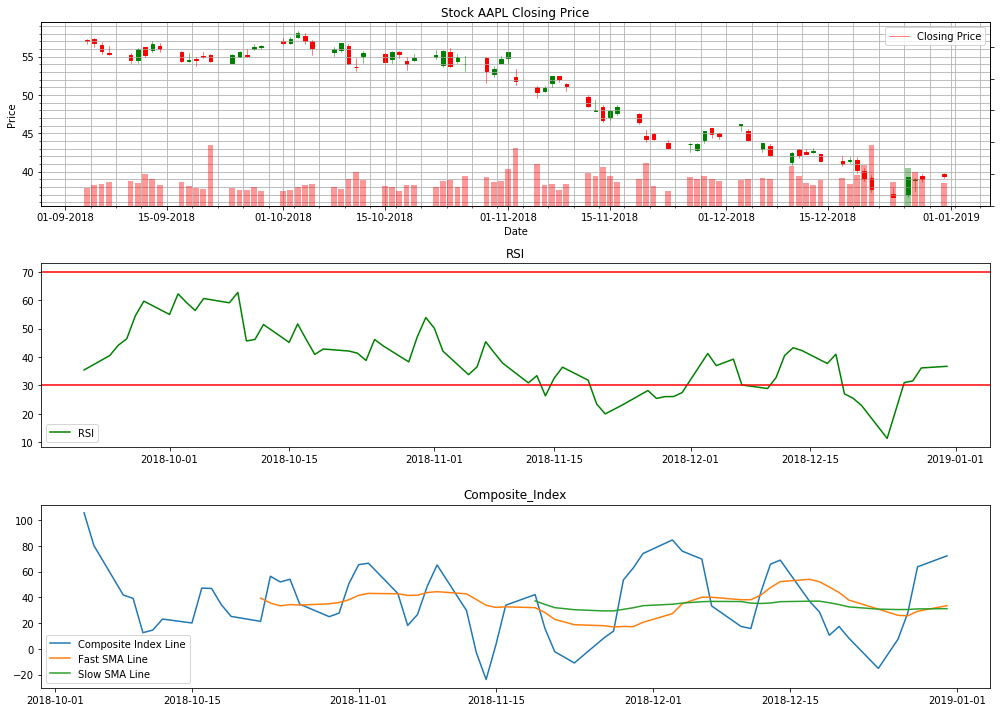

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1, dfc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc.Volume.max())
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(['Closing Price'], loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df.index, df['RSI_14'], label='RSI', color='g')
ax2.axhline(70, color='red', linestyle='-')
ax2.axhline(30, color='red', linestyle='-')
ax2.set_title('RSI')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df['Composite_Index'], label='Composite Index Line')
ax3.plot(df['Fast_SMA'], label='Fast SMA Line')
ax3.plot(df['Slow_SMA'], label='Slow SMA Line')
ax3.set_title('Composite_Index')
ax3.legend(loc='best')              
          
plt.tight_layout()
plt.show()